In [1]:
import pandas as pd
import requests

In [2]:
df = pd.read_csv('files/luftqualitaet/zentroide.csv')
#stadtteile = df['Y','X','Stadtteil']
df

,Y,X,gml_id,OBJECTID,Stadtteil,Bezirk,SHP_Length,SHP_Area
0,53.550183,9.946533,F18__1,1,Altona-Altstadt,Altona,8659.170122,2.716112e+06
1,53.563212,9.942568,F18__2,2,Altona-Nord,Altona,8133.220718,2.216385e+06
2,53.575000,9.902048,F18__3,3,Bahrenfeld,Altona,16711.715932,1.053408e+07
3,53.563179,9.794710,F18__4,4,Blankenese,Altona,13576.800934,7.730079e+06
4,53.564026,9.879685,F18__5,5,Groß Flottbek,Altona,6929.699281,2.369124e+06
...,...,...,...,...,...,...,...,...
101,53.668667,10.169402,F18__101,101,Volksdorf,Wandsbek,18775.512716,1.156793e+07
102,53.651938,10.165334,F18__101,101,Volksdorf,Wandsbek,18775.512716,1.156793e+07
103,53.583568,10.083219,F18__102,102,Wandsbek,Wandsbek,11752.468781,5.939625e+06
104,53.637807,10.081330,F18__103,103,Wellingsbüttel,Wandsbek,10113.636753,4.083628e+06


In [3]:
selected_columns = ['Stadtteil','Y','X']
stadtteile = df[selected_columns]
stadtteile

,Stadtteil,Y,X
0,Altona-Altstadt,53.550183,9.946533
1,Altona-Nord,53.563212,9.942568
2,Bahrenfeld,53.575000,9.902048
3,Blankenese,53.563179,9.794710
4,Groß Flottbek,53.564026,9.879685
...,...,...,...
101,Volksdorf,53.668667,10.169402
102,Volksdorf,53.651938,10.165334
103,Wandsbek,53.583568,10.083219
104,Wellingsbüttel,53.637807,10.081330


In [22]:
import json

def make_request_and_save(row):
    # URL für API Request Luftdaten für Punkt (X,Y) für 2022
    # Achtung: für token den token eintragen, aus Sicherheitsgründen hier nicht enthalten
    url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={row["X"]}&lon={row["Y"]}&start=1672531200&end=1704063540&appid=token'

    # Führen Sie den Request durch
    response = requests.get(url)

    # Überprüfen Sie, ob die Anfrage erfolgreich war (Status Code 200)
    if response.status_code == 200:
        # Konvertieren Sie die Response in JSON
        response_json = response.json()

        # Speichern Sie die JSON-Antwort in einer Datei
        filename = f'files/luftqualitaet/out/luftqualitaet_{row["Stadtteil"]}_2023.json'
        with open(filename, 'w') as file:
            json.dump(response_json, file)

        print(f'Response für {row["Stadtteil"]} wurde gespeichert.')
    else:
        print(f'Fehler bei der Anfrage für {row["Stadtteil"]}. Status Code: {response.status_code}')

# Anwenden der Funktion auf jede Zeile des DataFrames
stadtteile.apply(make_request_and_save, axis=1)

Response für Altona-Altstadt wurde gespeichert.
Response für Altona-Nord wurde gespeichert.
Response für Bahrenfeld wurde gespeichert.
Response für Blankenese wurde gespeichert.
Response für Groß Flottbek wurde gespeichert.
Response für Iserbrook wurde gespeichert.
Response für Lurup wurde gespeichert.
Response für Nienstedten wurde gespeichert.
Response für Osdorf wurde gespeichert.
Response für Othmarschen wurde gespeichert.
Response für Ottensen wurde gespeichert.
Response für Rissen wurde gespeichert.
Response für Sternschanze wurde gespeichert.
Response für Sülldorf wurde gespeichert.
Response für Allermöhe wurde gespeichert.
Response für Altengamme wurde gespeichert.
Response für Bergedorf wurde gespeichert.
Response für Billwerder wurde gespeichert.
Response für Curslack wurde gespeichert.
Response für Kirchwerder wurde gespeichert.
Response für Lohbrügge wurde gespeichert.
Response für Moorfleet wurde gespeichert.
Response für Neuallermöhe wurde gespeichert.
Response für Neueng

0      None
1      None
2      None
3      None
4      None
       ... 
101    None
102    None
103    None
104    None
105    None
Length: 106, dtype: object

In [11]:
import os

# Ordner mit den JSON-Dateien
json_folder = 'files/luftqualitaet/out/raw'

# Funktion zum Extrahieren der benötigten Daten aus einem JSON-File
def extract_data_from_json(json_filename, stadtteil):

    # Liste für die gesammelten Daten
    result_data = []

    with open(json_filename, 'r') as file:
        json_data = json.load(file)

    # Iteriere über die Einträge in der Liste
    for entry in json_data['list']:
        dt = entry['dt']
        aqi = entry['main']['aqi']

        # Konvertiere den 'dt'-Zeitstempel in ein Datetime-Objekt
        datetime_obj = pd.to_datetime(dt, unit='s')

        # Extrahiere Datum und Uhrzeit
        datum = datetime_obj.date()
        uhrzeit = datetime_obj.time()

        # Füge die Daten zur Ergebnisliste hinzu
        result_data.append({'timestamp': dt, 'datum': datum, 'uhrzeit': uhrzeit, 'Stadtteil': stadtteil, 'aqi': aqi})

    return result_data

# Iteriere durch jeden Stadtteil und führe die Funktion aus
for filename in os.listdir(json_folder):
    if filename.endswith(".json"):
        stadtteil = filename.split("_")[1]
        json_filepath = os.path.join(json_folder, filename)

        if os.path.exists(json_filepath):
            result_data_stadtteil = extract_data_from_json(json_filepath, stadtteil)
            # Erstelle einen DataFrame aus der Ergebnisliste
            result_df = pd.DataFrame(result_data_stadtteil)

            # Speichere den DataFrame als CSV-Datei
            result_df.to_csv(f'files/luftqualitaet/out/aqi/aqi_{stadtteil}_2023.csv', index=False)

            print(f'CSV Datei für {stadtteil} wurde geschrieben.')
        else:
            print(f'JSON-Datei {filename} existiert nicht.')



CSV Datei für Allermöhe wurde geschrieben.
CSV Datei für Alsterdorf wurde geschrieben.
CSV Datei für Altengamme wurde geschrieben.
CSV Datei für Altenwerder wurde geschrieben.
CSV Datei für Altona-Altstadt wurde geschrieben.
CSV Datei für Altona-Nord wurde geschrieben.
CSV Datei für Bahrenfeld wurde geschrieben.
CSV Datei für Barmbek-Nord wurde geschrieben.
CSV Datei für Barmbek-Süd wurde geschrieben.
CSV Datei für Bergedorf wurde geschrieben.
CSV Datei für Bergstedt wurde geschrieben.
CSV Datei für Billbrook wurde geschrieben.
CSV Datei für Billstedt wurde geschrieben.
CSV Datei für Billwerder wurde geschrieben.
CSV Datei für Blankenese wurde geschrieben.
CSV Datei für Borgfelde wurde geschrieben.
CSV Datei für Bramfeld wurde geschrieben.
CSV Datei für Cranz wurde geschrieben.
CSV Datei für Curslack wurde geschrieben.
CSV Datei für Dulsberg wurde geschrieben.
CSV Datei für Duvenstedt wurde geschrieben.
CSV Datei für Eidelstedt wurde geschrieben.
CSV Datei für Eilbek wurde geschrieben.

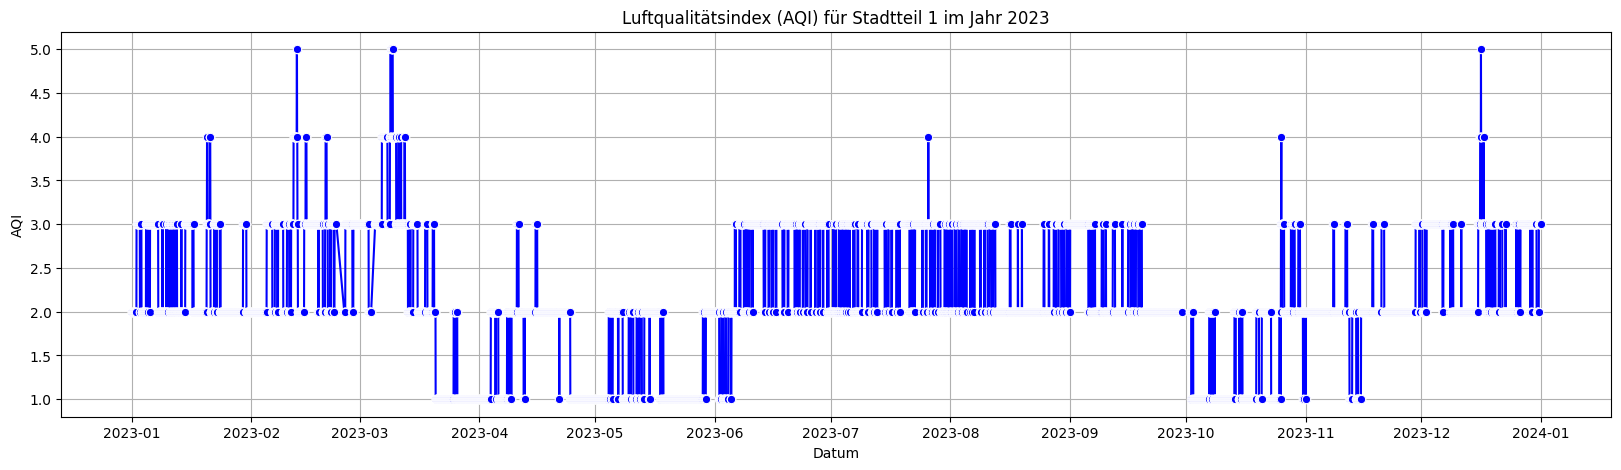

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Beispiel: Laden Sie eine CSV-Datei mit Luftqualitätsdaten
csv_file = 'files/luftqualitaet/out/aqi/aqi_Altona-Altstadt_2023.csv'
df = pd.read_csv(csv_file)

# Konvertiere 'timestamp' zu einem DateTime-Objekt
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Verwende seaborn für den Plot
plt.figure(figsize=(20, 5))
sns.lineplot(x='timestamp', y='aqi', data=df, marker='o', color='b', errorbar=None)

# Set x-axis ticks to show each month
plt.gca().xaxis.set_major_locator(MonthLocator())

plt.title('Luftqualitätsindex (AQI) für Stadtteil 1 im Jahr 2023')
plt.xlabel('Datum')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


In [38]:

# Verzeichnis, in dem deine CSV-Dateien liegen
verzeichnis_pfad = 'files/luftqualitaet/out/aqi'

# Liste zum Speichern der Datenrahmen für jeden Stadtteil
stadtteil_daten = []

# Durchsuche das Verzeichnis nach CSV-Dateien und verarbeite sie
for dateiname in os.listdir(verzeichnis_pfad):
    if dateiname.endswith('.csv'):
        stadtteil_name = dateiname.split('_')[1]  # Stadtteilname aus dem Dateinamen extrahieren
        dateipfad = os.path.join(verzeichnis_pfad, dateiname)

        # Einlesen der CSV-Datei und Berechnung des Durchschnitts
        stadtteil_data = pd.read_csv(dateipfad)
        stadtteil_mean = stadtteil_data['aqi'].mean()

        # Speichere den Stadtteilnamen und die Daten im Datenrahmen
        stadtteil_daten.append({'Stadtteil': stadtteil_name, 'Durchschnitt': stadtteil_mean})

# Erstelle einen neuen DataFrame mit allen Daten
ergebnisse = pd.DataFrame(stadtteil_daten)

# Speichere die Ergebnisse in einer neuen CSV-Datei
ergebnisse.to_csv('files/luftqualitaet/out/mittlereLuftqualitaet2023.csv', index=False)


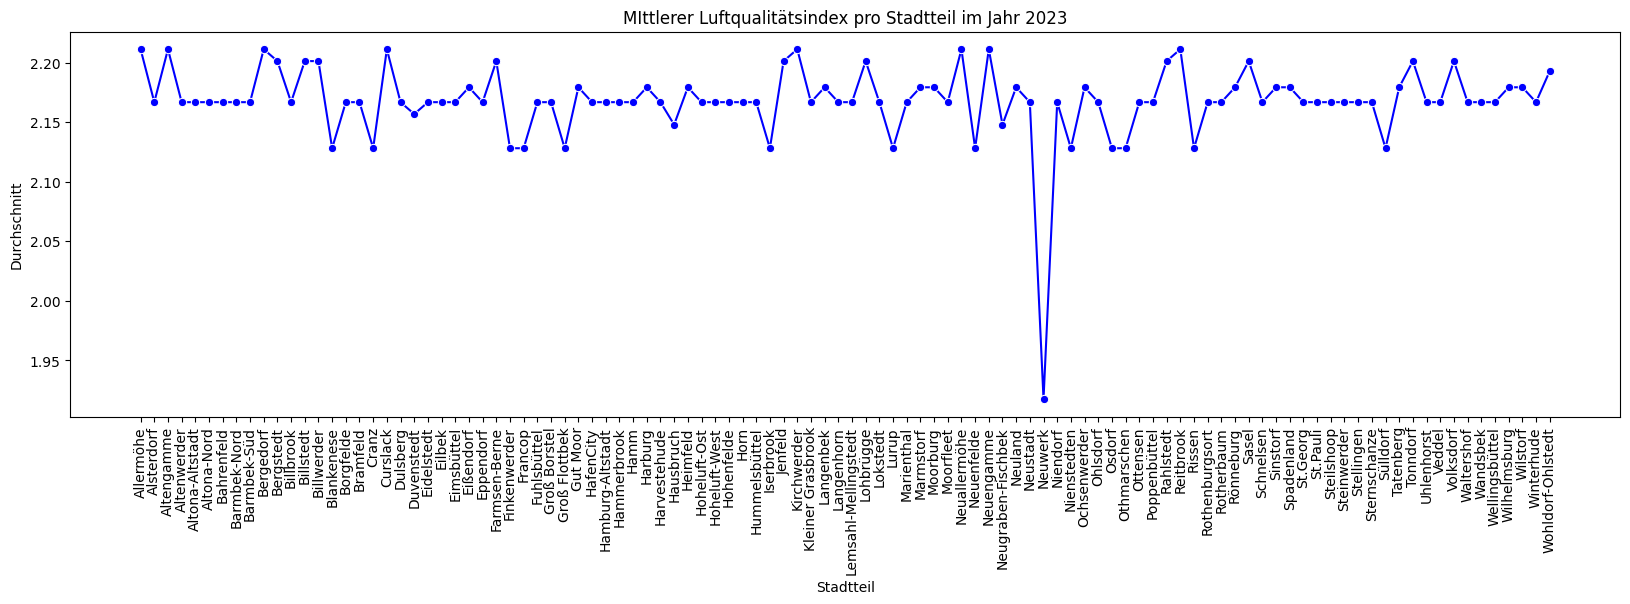

In [41]:

# Beispiel: Laden Sie eine CSV-Datei mit Luftqualitätsdaten
csv_file = 'files/luftqualitaet/out/mittlereLuftqualitaet2023.csv'
df = pd.read_csv(csv_file)


# Verwende seaborn für den Plot
plt.figure(figsize=(20, 5))
sns.lineplot(x='Stadtteil', y='Durchschnitt', data=df, marker='o', color='b', errorbar=None)


plt.title('Mittlerer Luftqualitätsindex pro Stadtteil im Jahr 2023')
plt.xlabel('Stadtteil')
plt.ylabel('Durchschnitt')
plt.xticks(rotation='vertical')
plt.show()

